In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:
classifier.add(Convolution2D(32, (3, 3), input_shape = (256,256,3), activation = 'relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
#second convo layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

In [6]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
#3 convo layer
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

In [8]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
classifier.add(Flatten())

In [10]:
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [11]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [15]:
training_set = train_datagen.flow_from_directory('../dataset/training_set/',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 16 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('../dataset/test_set/',
                                            target_size=(256, 256),
                                            batch_size=32,
                                            class_mode='binary')


Found 4 images belonging to 2 classes.


In [17]:
classifier.fit_generator(training_set,
                        steps_per_epoch=8,
                        epochs=75,
                        validation_data=test_set,
                        validation_steps=2)

Epoch 1/75
8/8 [==============================] - 5s 658ms/step - loss: 0.9114 - acc: 0.5156 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/75
8/8 [==============================] - 4s 497ms/step - loss: 0.6706 - acc: 0.6484 - val_loss: 0.8821 - val_acc: 0.5000
Epoch 3/75
8/8 [==============================] - 4s 520ms/step - loss: 0.6098 - acc: 0.6484 - val_loss: 0.9613 - val_acc: 0.5000
Epoch 4/75
8/8 [==============================] - 4s 496ms/step - loss: 0.4555 - acc: 0.7969 - val_loss: 1.7675 - val_acc: 0.5000
Epoch 5/75
8/8 [==============================] - 4s 521ms/step - loss: 0.2655 - acc: 0.8984 - val_loss: 2.0161 - val_acc: 0.2500
Epoch 6/75
8/8 [==============================] - 4s 484ms/step - loss: 0.2450 - acc: 0.9219 - val_loss: 2.2544 - val_acc: 0.5000
Epoch 7/75
8/8 [==============================] - 4s 526ms/step - loss: 0.3211 - acc: 0.8750 - val_loss: 1.2537 - val_acc: 0.5000
Epoch 8/75
8/8 [==============================] - 4s 537ms/step - loss: 0.2259 - acc: 0.92

Epoch 63/75
8/8 [==============================] - 4s 525ms/step - loss: 7.2632e-06 - acc: 1.0000 - val_loss: 7.1572 - val_acc: 0.5000
Epoch 64/75
8/8 [==============================] - 4s 543ms/step - loss: 4.4343e-05 - acc: 1.0000 - val_loss: 7.1545 - val_acc: 0.5000
Epoch 65/75
8/8 [==============================] - 4s 545ms/step - loss: 2.0285e-05 - acc: 1.0000 - val_loss: 7.1651 - val_acc: 0.5000
Epoch 66/75
8/8 [==============================] - 5s 586ms/step - loss: 5.5395e-06 - acc: 1.0000 - val_loss: 7.1730 - val_acc: 0.5000
Epoch 67/75
8/8 [==============================] - 4s 544ms/step - loss: 6.4882e-06 - acc: 1.0000 - val_loss: 7.1801 - val_acc: 0.5000
Epoch 68/75
8/8 [==============================] - 4s 513ms/step - loss: 1.7675e-05 - acc: 1.0000 - val_loss: 7.1850 - val_acc: 0.5000
Epoch 69/75
8/8 [==============================] - 4s 484ms/step - loss: 5.9091e-06 - acc: 1.0000 - val_loss: 7.1928 - val_acc: 0.5000
Epoch 70/75
8/8 [==============================] - 4s 4

In [18]:
classifier.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000001D289BB9160>>

In [19]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
__________

In [20]:
import numpy as np

In [21]:
from keras.preprocessing import image

In [44]:
test_image = image.load_img(path='../dataset/single_prediction/correct_or_wrong_1.jpg', target_size=(256, 256))

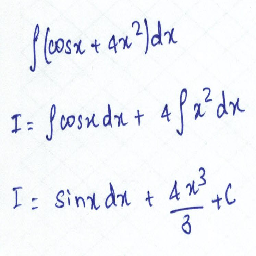

In [45]:
test_image

In [46]:
test_image = image.img_to_array(test_image)

In [47]:
test_image

array([[[250., 252., 251.],
        [250., 252., 251.],
        [250., 252., 251.],
        ...,
        [252., 253., 255.],
        [251., 252., 254.],
        [254., 255., 255.]],

       [[251., 253., 252.],
        [250., 252., 251.],
        [249., 251., 250.],
        ...,
        [252., 253., 255.],
        [251., 252., 254.],
        [250., 251., 253.]],

       [[250., 252., 251.],
        [250., 252., 251.],
        [250., 252., 251.],
        ...,
        [252., 253., 255.],
        [251., 252., 254.],
        [250., 251., 253.]],

       ...,

       [[252., 254., 253.],
        [252., 254., 253.],
        [252., 254., 253.],
        ...,
        [253., 254., 255.],
        [252., 253., 255.],
        [255., 255., 255.]],

       [[253., 255., 254.],
        [253., 255., 254.],
        [253., 255., 254.],
        ...,
        [253., 254., 255.],
        [253., 254., 255.],
        [255., 255., 255.]],

       [[253., 255., 254.],
        [253., 255., 254.],
        [253., 2

In [48]:
test_image = np.expand_dims(a=test_image,axis=0)

In [49]:
test_image.size

196608

In [50]:
result = classifier.predict(test_image)

In [51]:
result

array([[0.]], dtype=float32)

In [52]:
training_set.class_indices

{'correct': 0, 'wrong': 1}

In [53]:
def corrorwor(res):
    if res[0][0]==1:
        pred = "Wrong answer! Try again"
    else:
        pred = "Correct answer! Great JOB!"
    return pred

In [54]:
corrorwor(result)

'Correct answer! Great JOB!'